In [2]:
import pandas as pd

# Path to the CSV file
file_path = '/content/drive/MyDrive/Concepts and technology  of AI/Houseprice.csv'

# Read the CSV file into a Pandas DataFrame
house_price_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
house_price_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HouseAge    100 non-null    int64  
 1   HouseFloor  100 non-null    int64  
 2   HouseArea   100 non-null    float64
 3   HousePrice  100 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [3]:
def logistic_function(x):
    """
    Computes the logistic function applied to any value of x.
    Arguments:
    x: scalar or numpy array of any size.
    Returns:
    y: logistic function applied to x.
    """
    import numpy as np
    y = 1 / (1 + np.exp(-x))
    return y


In [4]:
import numpy as np

def logistic_function(x):
    """
    Computes the logistic function applied to any value of x.
    Arguments:
    x: scalar or numpy array of any size.
    Returns:
    y: logistic function applied to x.
    """
    return 1 / (1 + np.exp(-x))

def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # Expected output: 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # Expected output: ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # Expected output: ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])  # Adjusted expected values rounded to 3 decimals
    # Use np.round to round the array element-wise and compare
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"

    print("All tests passed!")

# Run the test case
test_logistic_function()


All tests passed!


In [5]:
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y = {0 or 1} and predicted target value y' in range {0-1}.
    Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted target value {0-1}.
    Returns:
    loss (float): loss/error value.
    """
    import numpy as np
    # Ensure y_pred is clipped to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Log loss formula
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


In [6]:
# Example usage
loss_1 = log_loss(1, 0.9)  # Expected: Low loss, as prediction is close to true value
loss_2 = log_loss(0, 0.1)  # Expected: Low loss, as prediction is close to true value
loss_3 = log_loss(1, 0.3)  # Expected: Higher loss, as prediction diverges from true value

print(f"Loss 1: {loss_1}")
print(f"Loss 2: {loss_2}")
print(f"Loss 3: {loss_3}")

Loss 1: 0.10536051565782628
Loss 2: 0.10536051565782628
Loss 3: 1.2039728043259361


In [7]:
# Test function for log_loss
y_true, y_pred = 0, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')


log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628


In [8]:
def test_log_loss():
    """
    Test cases for the log_loss function.
    """
    import numpy as np

    # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
    y_true = 1
    y_pred = 1
    expected_loss = 0.0  # Log loss is 0 for perfect prediction
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), \
        "Test failed for perfect prediction (y_true=1, y_pred=1)"

    # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
    y_true = 0
    y_pred = 0
    expected_loss = 0.0  # Log loss is 0 for perfect prediction
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), \
        "Test failed for perfect prediction (y_true=0, y_pred=0)"

    # Test case 3: Incorrect prediction (y_true = 1, y_pred = 0)
    y_true = 1
    y_pred = 0
    try:
        log_loss(y_true, y_pred)  # This should not raise an error due to clipping
    except ValueError:
        assert False, "Test failed for incorrect prediction (y_true=1, y_pred=0)"

    # Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
    y_true = 0
    y_pred = 1
    try:
        log_loss(y_true, y_pred)  # This should not raise an error due to clipping
    except ValueError:
        assert False, "Test failed for incorrect prediction (y_true=0, y_pred=1)"

    # Test case 5: Partially correct prediction
    y_true = 1
    y_pred = 0.8
    expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), \
        "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"

    y_true = 0
    y_pred = 0.2
    expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), \
        "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"

    print("All tests passed!")


# Run the test case
test_log_loss()


All tests passed!


In [9]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1).
    Args:
        y_true (array_like, shape (n,)): array of true values (0 or 1)
        y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)
    Returns:
        cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    import numpy as np

    # Ensure y_pred is clipped to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Check that lengths match
    assert len(y_true) == len(y_pred), "Length of true values and predicted values do not match"

    # Number of samples
    n = len(y_true)

    # Compute individual log loss for each prediction
    loss_vec = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # Compute the average log loss
    cost = np.mean(loss_vec)
    return cost


In [11]:
import numpy as np

def cost_function(y_true, y_pred):
    """
    Computes the binary cross-entropy loss.

    Parameters:
    y_true: numpy array of true labels (0 or 1)
    y_pred: numpy array of predicted probabilities (between 0 and 1)

    Returns:
    cost: Binary cross-entropy loss
    """
    # Avoid division by zero
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Binary cross-entropy formula
    cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return cost

# Input data
y_true = np.array([1, 0, 1, 1, 0])
y_pred = np.array([0.9, 0.2, 0.8, 0.6, 0.1])

# Calculate cost
cost = cost_function(y_true, y_pred)
print(f"Cost: {cost}")


Cost: 0.23356675154201256


In [12]:
import numpy as np

def test_cost_function():
    """
    Test cases for the cost_function.
    """
    # Test case 1: Simple example with known expected cost
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    # Expected output: Manually calculate cost for these values
    expected_cost = (
        -(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
        -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
        -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)
    ) / 3

    # Call the cost_function to get the result
    result = cost_function(y_true, y_pred)

    # Assert that the result is close to the expected cost with a tolerance of 1e-6
    assert np.isclose(result, expected_cost, atol=1e-6), \
        f"Test failed: {result} != {expected_cost}"

    print("Test passed for simple case!")

# Run the test case
test_cost_function()


Test passed for simple case!


In [13]:
import numpy as np

def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
        X (ndarray, shape (m, n)): data on features, m observations with n features.
        y (array_like, shape (m,)): array of true values of target (0 or 1).
        w (array_like, shape (n,)): weight parameters of the model.
        b (float): bias parameter of the model.
    Returns:
        cost (float): nonnegative cost corresponding to y and y_pred.
    """
    n, d = X.shape
    assert len(y) == n, "Number of feature observations and number of target observations do not match."
    assert len(w) == d, "Number of features and number of weight parameters do not match."

    # Compute z = X @ w + b
    z = np.dot(X, w) + b

    # Compute predictions using the logistic (sigmoid) function
    y_pred = 1 / (1 + np.exp(-z))

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)
    return cost


In [14]:
# Testing the Function:
X = np.array([[10, 20], [-10, 10]])  # 2 samples, 2 features
y = np.array([1, 0])  # Target values
w = np.array([0.5, 1.5])  # Weights for the features
b = 1  # Bias

# Compute the cost
cost = costfunction_logreg(X, y, w, b)

print(f"Cost for logistic regression (X = {X}, y = {y}, w = {w}, b = {b}): {cost}")


Cost for logistic regression (X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1): 5.500008350784907


In [15]:
import numpy as np

def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
        X (ndarray, shape (n, d)): Input data, n observations with d features.
        y (array_like, shape (n,)): True labels (0 or 1).
        w (array_like, shape (d,)): Weight parameters of the model.
        b (float): Bias parameter of the model.
    Returns:
        grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight parameters.
        grad_b (float): Gradient of the cost function with respect to the bias parameter.
    """
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute z = X @ w + b
    z = np.dot(X, w) + b

    # Compute predictions using logistic function (sigmoid)
    y_pred = 1 / (1 + np.exp(-z))  # Sigmoid function to get predicted probabilities

    # Compute gradients
    grad_w = (1 / n) * np.dot(X.T, (y_pred - y))  # Gradient w.r.t weights (shape: d,)
    grad_b = (1 / n) * np.sum(y_pred - y)  # Gradient w.r.t bias (scalar)

    return grad_w, grad_b

In [16]:
# Sample data
X = np.array([[10, 20], [-10, 10]])  # 2 samples, 2 features
y = np.array([1, 0])  # Target values
w = np.array([0.5, 1.5])  # Weights for the features
b = 1  # Bias

# Compute the gradients
grad_w, grad_b = compute_gradient(X, y, w, b)

print(f"Gradients with respect to weights: {grad_w}")
print(f"Gradient with respect to bias: {grad_b}")


Gradients with respect to weights: [-4.99991649  4.99991649]
Gradient with respect to bias: 0.4999916492890759


In [17]:
import numpy as np

# Function to compute the gradients of the cost function
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
        X (ndarray, shape (n, d)): Input data, n observations with d features.
        y (array_like, shape (n,)): True labels (0 or 1).
        w (array_like, shape (d,)): Weight parameters of the model.
        b (float): Bias parameter of the model.
    Returns:
        grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight parameters.
        grad_b (float): Gradient of the cost function with respect to the bias parameter.
    """
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute z = X @ w + b
    z = np.dot(X, w) + b

    # Compute predictions using logistic function (sigmoid)
    y_pred = 1 / (1 + np.exp(-z))  # Sigmoid function to get predicted probabilities

    # Compute gradients
    grad_w = (1 / n) * np.dot(X.T, (y_pred - y))  # Gradient w.r.t weights (shape: d,)
    grad_b = (1 / n) * np.sum(y_pred - y)  # Gradient w.r.t bias (scalar)

    return grad_w, grad_b

# Simple test case
X = np.array([[10, 20], [-10, 10]])  # shape (2, 2)
y = np.array([1, 0])  # shape (2,)
w = np.array([0.5, 1.5])  # shape (2,)
b = 1  # scalar

# Assertion tests
try:
    grad_w, grad_b = compute_gradient(X, y, w, b)
    print("Gradients computed successfully.")
    print(f"grad_w: {grad_w}")
    print(f"grad_b: {grad_b}")
except AssertionError as e:
    print(f"Assertion error: {e}")


Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


In [18]:
import numpy as np

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.

    Args:
        X (ndarray, shape (n, d)): Data on features, n observations with d features.
        y (array_like, shape (n,)): True values of target (0 or 1).
        w (array_like, shape (d,)): Initial weight parameters.
        b (float): Initial bias parameter.
        alpha (float): Learning rate.
        n_iter (int): Number of iterations.
        show_cost (bool): If True, displays cost every 100 iterations.
        show_params (bool): If True, displays parameters every 100 iterations.

    Returns:
        w (array_like, shape (d,)): Optimized weight parameters.
        b (float): Optimized bias parameter.
        cost_history (list): List of cost values over iterations.
        params_history (list): List of parameters (w, b) over iterations.
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    # Loop through the number of iterations
    for i in range(n_iter):
        # Compute z = X @ w + b
        z = np.dot(X, w) + b

        # Compute predictions using sigmoid function
        y_pred = 1 / (1 + np.exp(-z))

        # Compute gradients
        grad_w = (1 / n) * np.dot(X.T, (y_pred - y))  # Gradient w.r.t weights
        grad_b = (1 / n) * np.sum(y_pred - y)  # Gradient w.r.t bias

        # Update weights and bias using the gradients and learning rate (alpha)
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute the cost using log loss (logistic regression cost)
        cost = (-1 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history

# Test the gradient_descent function with sample data
X = np.array([[0.1, 0.2], [-0.1, 0.1]])  # Shape (2, 2)
y = np.array([1, 0])  # Shape (2,)
w = np.zeros(X.shape[1])  # Shape (2,) - same as number of features
b = 0.0  # Scalar
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations

# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True, show_params=False)

# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")


Iteration 0: Cost = 0.693147
Iteration 100: Cost = 0.662954
Iteration 200: Cost = 0.634606
Iteration 300: Cost = 0.607963
Iteration 400: Cost = 0.582914
Iteration 500: Cost = 0.559357
Iteration 600: Cost = 0.537192
Iteration 700: Cost = 0.516328
Iteration 800: Cost = 0.496677
Iteration 900: Cost = 0.478158
Iteration 999: Cost = 0.460863

Final parameters:
w: [4.30539485 2.10704574], b: -0.30434456824754946
Final cost: 0.460863


In [19]:
import numpy as np

def test_gradient_descent():
    # Test data
    X = np.array([[0.1, 0.2], [-0.1, 0.1]])  # Shape (2, 2)
    y = np.array([1, 0])  # Shape (2,)
    w = np.zeros(X.shape[1])  # Shape (2,) - same as number of features
    b = 0.0  # Scalar
    alpha = 0.1  # Learning rate
    n_iter = 100  # Number of iterations

    # Run gradient descent
    w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False)

    # Assertions
    assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
    assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out, float), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"

    print("All tests passed!")

# Run the test
test_gradient_descent()


All tests passed!


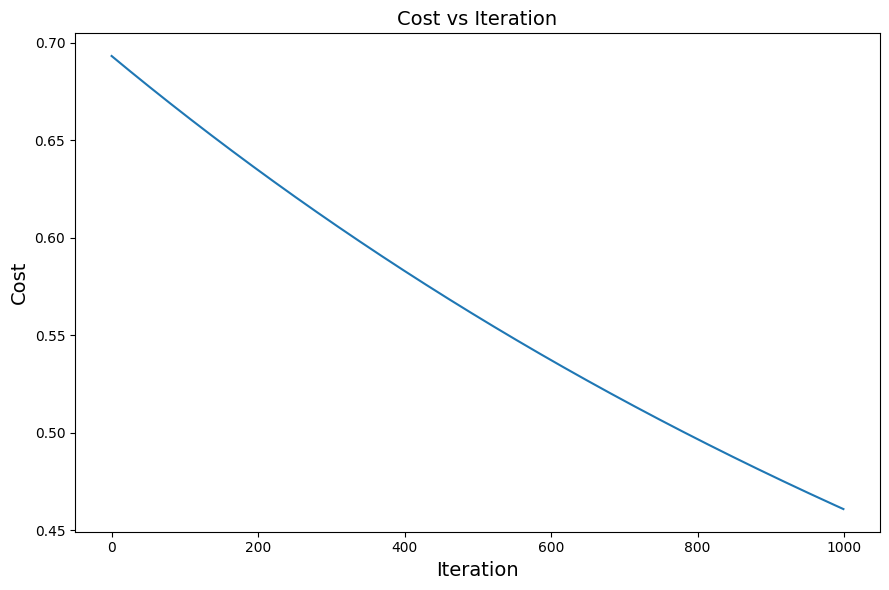

In [20]:
import matplotlib.pyplot as plt

# Plotting cost over iteration
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()


In [21]:
import numpy as np

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.
    Arguments:
    X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
    w (ndarray, shape (d,)): Array of weights learned via gradient descent.
    b (float): Bias learned via gradient descent.
    threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.
    Returns:
    y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute the predicted probabilities using the logistic function
    z = np.dot(X, w) + b  # Linear combination: z = wx + b
    y_test_prob = 1 / (1 + np.exp(-z))  # Logistic (sigmoid) function

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)  # If probability >= threshold, classify as 1, else 0
    return y_pred

In [22]:
import numpy as np

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.
    Arguments:
    X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
    w (ndarray, shape (d,)): Array of weights learned via gradient descent.
    b (float): Bias learned via gradient descent.
    threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.
    Returns:
    y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute the predicted probabilities using the logistic function
    z = np.dot(X, w) + b  # Linear combination: z = wx + b
    y_test_prob = 1 / (1 + np.exp(-z))  # Logistic (sigmoid) function

    # Debug print to inspect z and y_test_prob values
    print(f"z: {z}")
    print(f"y_test_prob: {y_test_prob}")

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)  # If probability >= threshold, classify as 1, else 0
    return y_pred

def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])  # Shape (3, 2)
    w_test = np.array([1.0, -1.0])  # Shape (2,)
    b_test = 0.0  # Scalar bias
    threshold = 0.5  # Default threshold

    # Updated expected output
    expected_output = np.array([0, 1, 1])

    # Call the prediction function
    y_pred = prediction(X_test, w_test, b_test, threshold)

    # Assert that the output matches the expected output
    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
    print("Test passed!")

# Run the test
test_prediction()


z: [-0.5  2.   0.5]
y_test_prob: [0.37754067 0.88079708 0.62245933]
Test passed!


In [23]:
import numpy as np

def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.
    Arguments:
    y_true (ndarray, shape (n,)): Ground truth binary labels (0 or 1).
    y_pred (ndarray, shape (n,)): Predicted binary labels (0 or 1).
    Returns:
    metrics (dict): A dictionary containing confusion matrix, precision, recall, and F1-score.
    """
    # Initialize confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    # Precision, recall, and F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0.0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0.0 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0.0 else 0.0

    # Metrics dictionary
    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

    return metrics


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Dataset URL or Path (you need to provide the actual URL or path where the data is stored)
url = '/content/drive/MyDrive/Concepts and technology  of AI/Houseprice.csv'  # Replace with the actual path or URL to your dataset

# Define the column names based on the dataset you provided
columns = ['HouseAge', 'HouseFloor', 'HouseArea', 'HousePrice']

# Load the dataset
data = pd.read_csv(url, names=columns)

# Display the first few rows to verify the data
print(data.head())

   HouseAge  HouseFloor           HouseArea          HousePrice
0  HouseAge  HouseFloor           HouseArea          HousePrice
1        52           2  112.94557395634104   543917.1798414207
2        93           1  174.31212647309636   817740.1248277097
3        15           4  125.21957745419242   387992.5030193243
4        72           4   121.2101235943669  240840.74238817807


In [26]:
# Data cleaning
columns_to_clean = ['HouseAge', 'HouseFloor', 'HouseArea', 'HousePrice']

# Convert columns to numeric (if they aren't already)
data[columns_to_clean] = data[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Replace 0 values with NaN in the specified columns
data[columns_to_clean] = data[columns_to_clean].replace(0, np.nan)

# Fill NaN values with the median of each column
data.fillna(data.median(), inplace=True)

# Check the information of the dataset after cleaning
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HouseAge    101 non-null    float64
 1   HouseFloor  101 non-null    float64
 2   HouseArea   101 non-null    float64
 3   HousePrice  101 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB


In [27]:
# Data cleaning
columns_to_clean = ['HouseAge', 'HouseFloor', 'HouseArea', 'HousePrice']
data[columns_to_clean] = data[columns_to_clean].replace(0, np.nan)  # Replace 0 values with NaN
data.fillna(data.median(), inplace=True)  # Fill NaN with median values of each column

# Check the information of the dataset after cleaning
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HouseAge    101 non-null    float64
 1   HouseFloor  101 non-null    float64
 2   HouseArea   101 non-null    float64
 3   HousePrice  101 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB


In [28]:
# Get summary statistics for the dataset
data.describe()


,HouseAge,HouseFloor,HouseArea,HousePrice
count,101.000000,101.000000,101.000000,1.010000e+02
mean,51.564356,2.910891,170.291879,5.787014e+05
std,29.279486,1.449821,70.944490,2.602292e+05
min,2.000000,1.000000,51.265396,1.493562e+05
25%,24.000000,1.000000,109.890473,3.911016e+05
50%,54.000000,3.000000,176.846510,5.391941e+05
75%,76.000000,4.000000,222.734435,7.434866e+05
max,100.000000,5.000000,296.412614,1.228712e+06


In [29]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (X) and target (y) columns
X = data.drop(columns=['HousePrice']).values  # Using all columns except 'HousePrice' as features
y = data['HousePrice'].values  # 'HousePrice' as the target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (mean = 0, standard deviation = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Only transform the test data (using the same scaler)



Training Linear Regression Model:
Cost at iteration 0: 220552257334.18665
Cost at iteration 1: 180757590333.53146
Cost at iteration 2: 148543280217.7125
Cost at iteration 3: 122464290923.54718
Cost at iteration 4: 101351263327.0109
Cost at iteration 5: 84257880762.37823
Cost at iteration 6: 70418292519.80072
Cost at iteration 7: 59212671562.34097
Cost at iteration 8: 50139351024.33066
Cost at iteration 9: 42792281777.65935
Cost at iteration 10: 36842794028.89766
Cost at iteration 11: 32024840482.3073
Cost at iteration 12: 28123055913.750893
Cost at iteration 13: 24963095192.34125
Cost at iteration 14: 22403814633.02513
Cost at iteration 15: 20330944729.067684
Cost at iteration 16: 18651969568.576466
Cost at iteration 17: 17291982630.756306
Cost at iteration 18: 16190332648.330803
Cost at iteration 19: 15297908803.279602
Cost at iteration 20: 14574943303.048512
Cost at iteration 21: 13989232664.741417
Cost at iteration 22: 13514697867.391838
Cost at iteration 23: 13130218767.74091
Cost

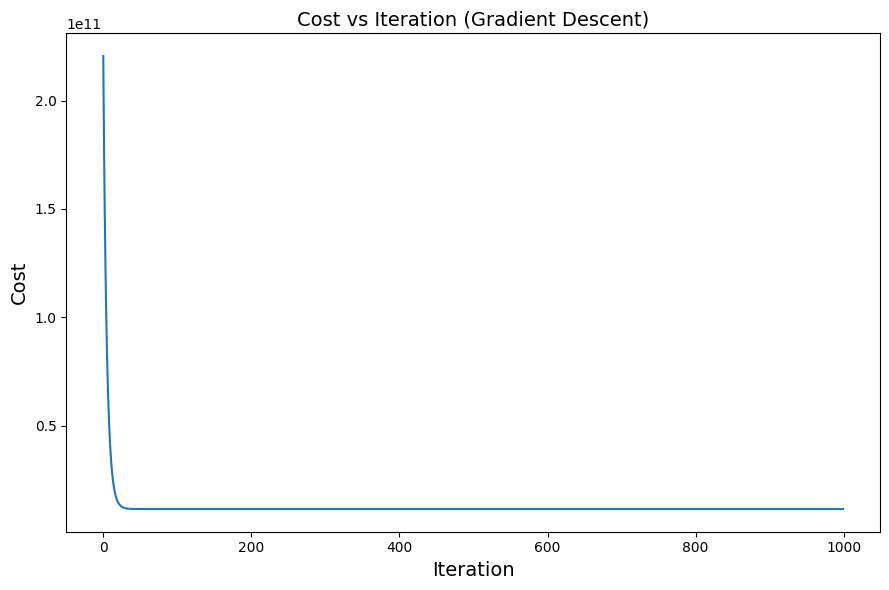

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent for Linear Regression
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False):
    m = len(y)
    cost_history = []
    params_history = []

    for _ in range(n_iter):
        # Compute predictions
        predictions = X.dot(w) + b

        # Compute cost (Mean Squared Error)
        cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
        cost_history.append(cost)

        # Compute gradients
        dw = (1/m) * X.T.dot(predictions - y)
        db = (1/m) * np.sum(predictions - y)

        # Update parameters
        w -= alpha * dw
        b -= alpha * db

        # Store parameter history
        if show_params:
            params_history.append((w.copy(), b))

        if show_cost:
            print(f"Cost at iteration {_}: {cost}")

    return w, b, cost_history, params_history

# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations

# Train model
print("\nTraining Linear Regression Model:")
w, b, cost_history, params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter,
                                                      show_cost=True, show_params=False)

# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration (Gradient Descent)", fontsize=14)
plt.tight_layout()
plt.show()



Mean Absolute Error (MAE): 119817.16
Mean Squared Error (MSE): 21583502499.85
Root Mean Squared Error (RMSE): 146913.25
R-squared: 0.31


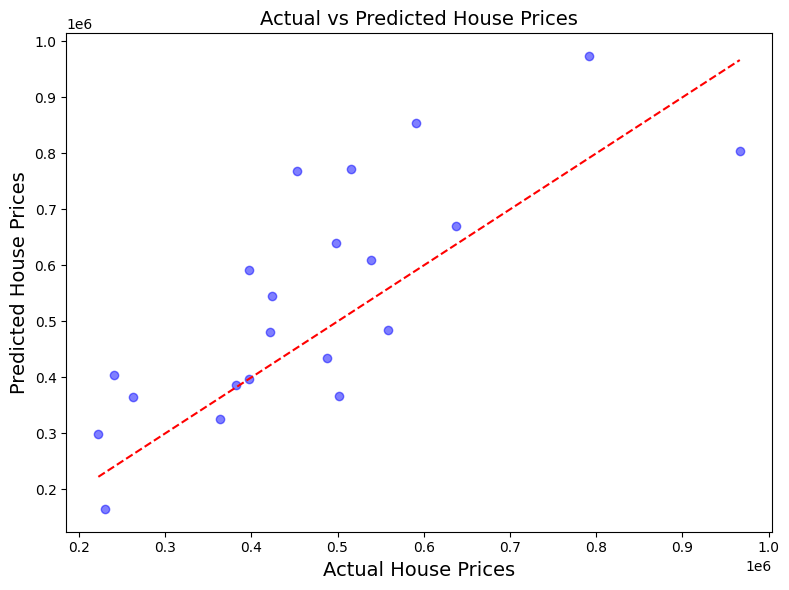

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predict on test data
y_test_pred = X_test_scaled.dot(w) + b  # For Linear Regression

# Calculate Evaluation Metrics for Regression
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print Evaluation Metrics
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Optional: Visualizing Actual vs Predicted House Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual House Prices', fontsize=14)
plt.ylabel('Predicted House Prices', fontsize=14)
plt.title('Actual vs Predicted House Prices', fontsize=14)
plt.tight_layout()
plt.show()
